# LİSANSÜSTÜ KABUL

## İçindekiler

### 1.Giriş

### 2.Projenin Amacı

### 3.Veriye Genel Bakış

### 4.Veri Çerçeveleri

### 5.Veri Temizliği
  #### 5.1. Eksik Değerler
  #### 5.2. Aykırı Değerler

### 6.Veri Keşfi

### 7.Regresyon Modelleri
####         7.1.Model İyileştirmeleri
#### 7.2.Lineer Regresyon Varsayımları
#### 7.3.Overfitting
#### 7.4.Ridge ve Lasso Düzenlemeleri

### 8.Sonuçlar

## 1.Giriş

Bilindiği üzere yüksek lisans çoğu öğrencinin kariyerinde iyi noktalara gelebilmak amacıyla hayatının bir döneminde eğitimini almak istediği bir kariyer basamağıdır.
Bunun için kazanmak isteyen öğrencilerin yüksek alması gereken sınavlar , okul başarı durumu , dil bilgisi ve benzeri birçok etken bulunmaktadır.Bu projede yüksek lisansa etki eden
8 özellikle çalışacağız.Bu veri seti yüksek lisans kabullerinin Hint bakış açısıyla tahmin edilmesi için oluşturulmuş bir veri setidir ve UCLA Lisansüstü veri kümesinden ilham almıştır. Test puanları ve not ortalaması eski formattadır. Veri seti Mohan S Acharya'ya aittir.

## 2.Projenin Amacı

Projemizin amacı verideki özellikleri kullanarak hedef değişkenimiz olan kabul şansı yani veri setindeki karşılığıyla "Chance of Admit" 
kolonuna etki eden kriterleri gözlemlemek ve regresyon modelleri oluşturularak öğrencilerin kabul şanslarını tahmin etmeye çalışmak.

## 3.Veriye Genel Bakış

Veride 9 sütunumuz ve 400 satırımız vardır.Fakat serial no. kolonu çalışırken işimize yaramayacağı için devre dışı bırakılmıştır.


Gre_Score:Öğrencilerin mezun oldukları puanlar (340 üzerinden)

Toefl_Score:Sınavlardan alınan TOEFL puanı (120 üzerinden)

University_Rating:Üniversite puanı (5 üzerinden , 5 en iyi-1 en kötü)

SOP:Amaç beyanı (5 üzerinden)

LOR:Referans mektubu (5 üzerinden)

CGPA:Lisans genel ortalaması (5 üzerinden)

Research:Araştırma deneyimi (0 veeya 1)

Chance of Admit:Kabul şansı (0-1 arasında değişmketedir)


## 4.Veri Çerçeveleri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import decomposition, datasets
from sklearn.linear_model import Ridge, ElasticNet, Lasso, LassoLarsCV
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model

from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import linear_model
import statsmodels.api as sm

%matplotlib inline

In [2]:
df=pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Veri kümemizde 5'i integer 4'ü float olmak üzere 9 numerik kolon vardır.

In [4]:
df=df.rename(columns = {"LOR ":"LOR",'Chance of Admit ':'Chance of Admit',"GRE Score":"Gre_Score","TOEFL Score":"Toefl_Score","University Rating":"University_Rating"
                       })

Daha kolay çalışabilmek adına bazı kolonlarımızda isim değişikliği yaptık.

In [57]:
cols=df.drop(labels='Serial No.',axis=1)
cols.head()

,Gre_Score,Toefl_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit,sop_uni,cg_res
0,337,118,4,4.5,4.5,9.65,1,0.92,18.0,14634.225
1,324,107,4,4.0,4.5,8.87,1,0.76,16.0,12932.460
2,316,104,3,3.0,3.5,8.00,1,0.72,9.0,8848.000
3,322,110,3,3.5,2.5,8.67,1,0.80,10.5,6979.350
4,314,103,2,2.0,3.0,8.21,0,0.65,4.0,7733.820


In [58]:
df.describe()

,Serial No.,Gre_Score,Toefl_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit,sop_uni,cg_res
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350,11.341250,9587.745038
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609,6.619003,3166.758102
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000,1.000000,2194.660000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000,6.000000,7395.300000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000,10.500000,9240.237500
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000,16.000000,11782.068750
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000,25.000000,16558.000000


## 5.Veri Temizliği

### 5.1.Eksik Değerler

In [5]:
df.isnull().sum()

Serial No.           0
Gre_Score            0
Toefl_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Verisetinde eksik değerimiz bulunmamaktadır.

### 5.2.Aykırı Değerler

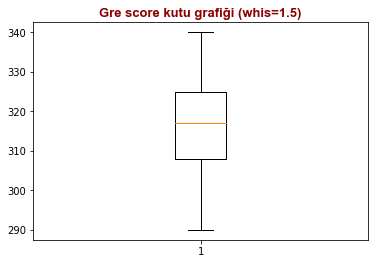

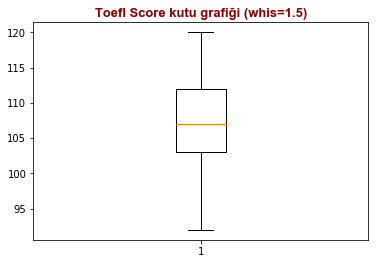

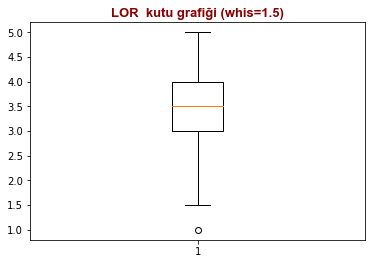

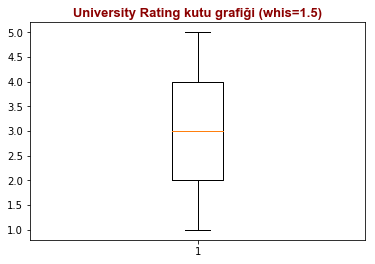

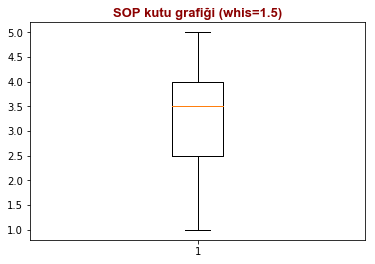

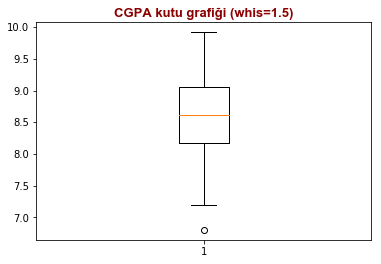

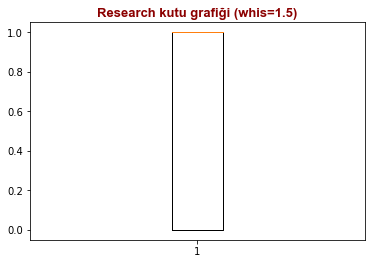

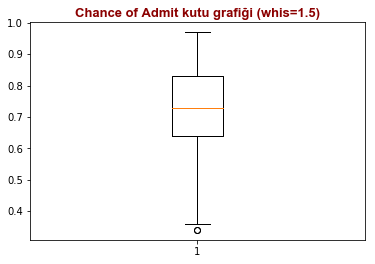

In [8]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(df["Gre_Score"],whis=1.5)
plt.title("Gre score kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

plt.boxplot(df["Toefl_Score"],whis=1.5)
plt.title("Toefl Score kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()


plt.boxplot(df["LOR"],whis=1.5)
plt.title("LOR  kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()


plt.boxplot(df["University_Rating"],whis=1.5)
plt.title("University Rating kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

plt.boxplot(df["SOP"],whis=1.5)
plt.title("SOP kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

plt.boxplot(df["CGPA"],whis=1.5)
plt.title("CGPA kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

plt.boxplot(df["Research"],whis=1.5)
plt.title("Research kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

plt.boxplot(df["Chance of Admit"],whis=1.5)
plt.title("Chance of Admit kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

LOR , CGPA ve Chance of Admit kolonlarında çok küçük bir aykırı değer gözlemlenmketedir.Veri setinin özellikleri göz önüne alındığında bu 
aykırı değerler olasıdır ve aykırı değerlerle uğraşmaya gerek duyulmamaktadır.

## 6.Veri Keşfi

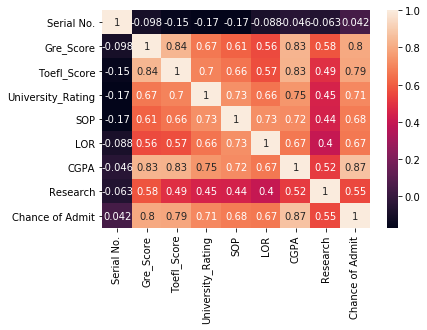

In [10]:
sns.heatmap(df.corr(), annot=True)

Hedef değişkenimiz olan Chance of Admit kolonuyla korelasyon katsayısı en yüksek olan kolonlarımız sırasıyla CGPA , Gre_Score , Toefl_Score ,
University_Rating , SOP , LOR ve Researh.Öğrencilerin yüksek lisansa kabul edilmek için lisans genel ortalamalarını yüksek seviyede tutmaları gerekmektedir.Öncesinde araştırma deneyimine sahip olup olmadıkları ise öğrencilerde en az dikkat edilen kriterler arasındadır.

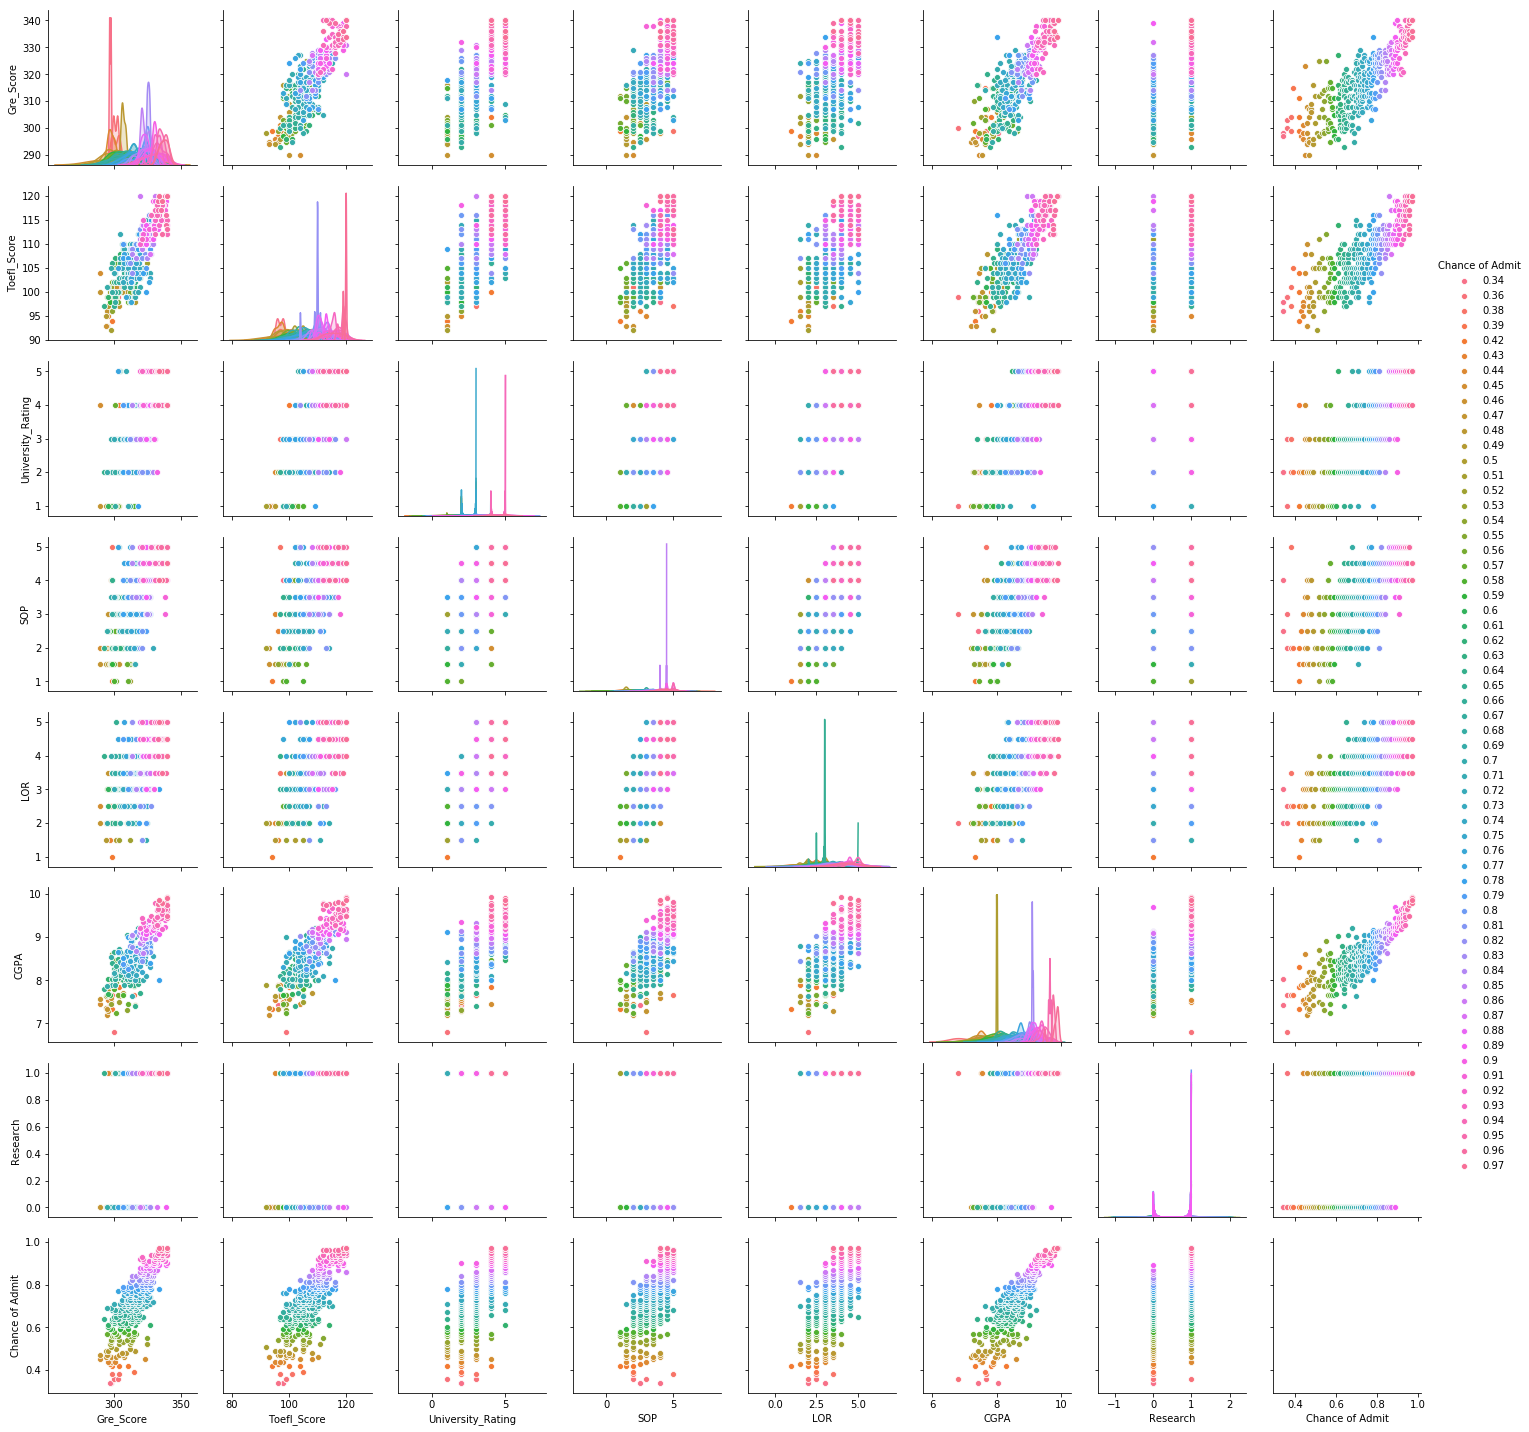

In [11]:
sns.pairplot(data=cols,hue='Chance of Admit')

Gre_Score , Tofl_core değişkenlerinin arttıkça kabul şansımızın da arttığını gözlemlemekteyiz yani aralarında doğrusal bir ilişki vardır.Ayrıca üniversitenin başarı
sıralaması da yüksek lisans da önemli bir faktördür fakat kabul şansının en yüksek görüldüğü üniversite seviyesi 5 değil 4'tür.
Yani öğrencinin üniversite başarısı ve kendi başarısıyla ortaya sunduğu çaba birlikte anlamlanmaktadır.

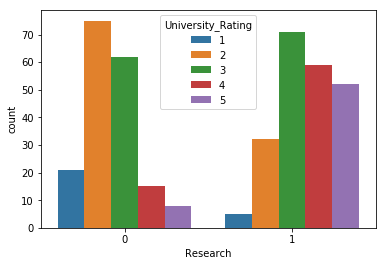

In [50]:
sns.countplot(x='Research', hue='University_Rating', data=df)
plt.show()

Researh hedef değişkenimizle olan korelasyon katsayısı en düşük olan değişkenmizdi.Bunu ayrıca incelemek istersek ; 
Araştırma deneyimine sahip olmayan öğrencilerden en fazla başvuruyu yapan üniversite başarı sıralaması 2 olan öğrencilerdir.
Araştırma deneyimine sahip olan öğrencilerde ise bu sıralama 3'e çıkmaktadır.
En iyi üniversitelerde okuyanların büyük bir çoğunluğu araştırma deneyimine sahiptir.
En kötü başarı sıralamasında olan üniersitelerin çok az bir böllümünde bu deneyim sunulmaktadır.

(array([ 5., 28., 35., 39., 64., 54., 68., 51., 31., 25.]),
 array([290., 295., 300., 305., 310., 315., 320., 325., 330., 335., 340.]),
 <a list of 10 Patch objects>)

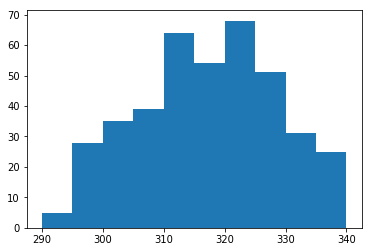

In [39]:
plt.hist(df['Gre_Score'])

Gre_Score değişkeni normal dağılıma yakınlık göstermektedir.Öğrencilerin en fazla dağılım göstediği puan aralığı 320-330 arasındadır.

(array([ 4., 12., 46., 44., 53., 67., 71., 50., 27., 26.]),
 array([ 92. ,  94.8,  97.6, 100.4, 103.2, 106. , 108.8, 111.6, 114.4,
        117.2, 120. ]),
 <a list of 10 Patch objects>)

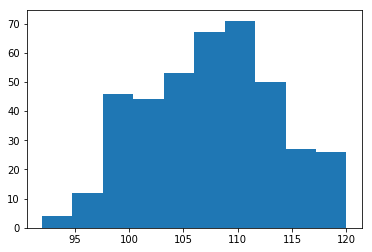

In [40]:
plt.hist(df['Toefl_Score'])

Toefl puanlarındaki en yüksek dağılım 110-115 arasındadır.

(array([ 26.,   0., 107.,   0.,   0., 133.,   0.,  74.,   0.,  60.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

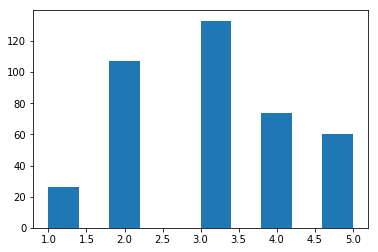

In [41]:
plt.hist(df['University_Rating'])

Öğrencilerin en yüksek dağılım gösterdiği üniversite başarı sıralaması 3-3.5 arasıdır.Bu değerin ortalamanın üzerind eoluşu genel anlamda başarılı öğrenciler üzerinde uygulanmış bir veri olduğunu gösterir.

(array([ 6., 20., 33., 47.,  0., 64., 70., 70., 53., 37.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

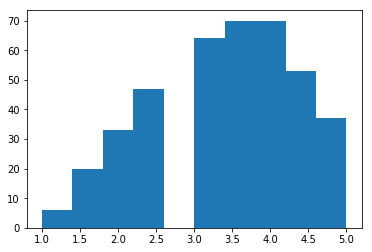

In [42]:
plt.hist(df['SOP'])

Öğrencilerin çoğunluğu amaç beyanına önem vermektedirler ve bunun üzerinde puanlandıklarında en fazla dağılım 3.5-4 araındadır.

(array([ 1.,  7., 38., 39.,  0., 85., 73., 77., 45., 35.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

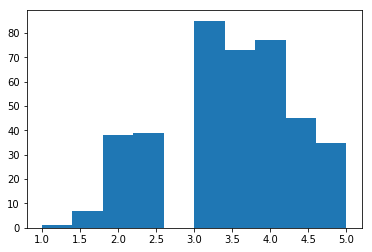

In [43]:
plt.hist(df['LOR'])

Referan mektubunda çoğunluk 3 ve 3.5'a yakın puanlandırılmıştır.

(array([ 1.,  8., 24., 45., 64., 80., 60., 67., 31., 20.]),
 array([6.8  , 7.112, 7.424, 7.736, 8.048, 8.36 , 8.672, 8.984, 9.296,
        9.608, 9.92 ]),
 <a list of 10 Patch objects>)

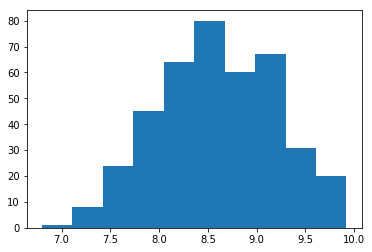

In [44]:
plt.hist(df['CGPA'])

Normal dağılıma yakın bir dağılım göstermiştir.Çoğunluk 8.5 ve çevresinde toplanmıştır.

(array([181.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 219.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

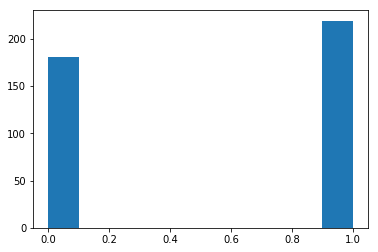

In [45]:
plt.hist(df['Research'])

ARaştırma deneyimine sahip insanların sayısı deneyimsiz insanlardan daha fazladır.

## 7.Regresyon Modelleri

Bu bölümde 5 yeni model oluşturduk sonrasında bunları karşılaştırdık ve seçilen modelleri iyileştirmeye çalıştık.

In [12]:
Y = df['Chance of Admit']
X = df[["Gre_Score","Toefl_Score","CGPA","University_Rating","SOP","Research","LOR"]]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 320
Test kümesindeki gözlem sayısı   : 80


Öncelikli olarak verisetimizi sonrasında tahminlerimizi gözlemyebilmek adına eğitim ve test kümesi olarak 2'ye ayırıyoruz.
veri setimizin %20'lik kısmı test etmek için , %80'lik kısmı ise veriyi eğitmek için oluşturuldu.

In [14]:
df1=df[["Gre_Score","Toefl_Score","CGPA","University_Rating","SOP","Research","LOR"]]
df2=df[["Gre_Score","Toefl_Score","CGPA","University_Rating"]]
df3=df[["SOP","Research","LOR"]]
df4=df[["Gre_Score","CGPA","Research","LOR"]]

df1 modeli:Verisetinde az özelliğe sahip olduğumuz için öncelikli olarak tüm özelliklerin içinde bulunduğu bir model oluşturduk.

df2 modeli:Korelasyon katsayısı 0.70'den büyük olan özelliklerle bir model oluşturduk.

df3 modeli:Korelasyon katsayısı en düşük olan 3 özellik ile bir model oluşturduk.

df4 modeli:Korelasyon katsayısı en düşük olan 2 özellik ve en yüksek olan 2 özellik ile bir model oluşturduk.

In [15]:
print("MODEL 1")
df1_train, df1_test, y_train, y_test = train_test_split(df1, Y, test_size = 0.2, random_state = 2)
df1_train= sm.add_constant(df1_train)
df1_result=sm.OLS(y_train,df1_train).fit()
print(df1_result.summary())

print("MODEL 2")
df2_train, df2_test, y_train, y_test = train_test_split(df2, Y, test_size = 0.2, random_state = 2)
df2_train= sm.add_constant(df2_train)
df2_result=sm.OLS(y_train,df2_train).fit()
print(df2_result.summary())

print("MODEL 3")
df3_train, df3_test, y_train, y_test = train_test_split(df3, Y, test_size = 0.2, random_state = 2)
df3_train= sm.add_constant(df3_train)
df3_result=sm.OLS(y_train,df3_train).fit()
print(df3_result.summary())

print("MODEL 4")
df4_train, df4_test, y_train, y_test = train_test_split(df4, Y, test_size = 0.2, random_state = 2)
df4_train= sm.add_constant(df4_train)
df4_result=sm.OLS(y_train,df4_train).fit()
print(df4_result.summary())

MODEL 1
                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     186.7
Date:                Thu, 30 May 2019   Prob (F-statistic):          1.55e-107
Time:                        14:33:34   Log-Likelihood:                 431.80
No. Observations:                 320   AIC:                            -847.6
Df Residuals:                     312   BIC:                            -817.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3199  

F istatiği özelliklerimizin indirgenmiş modele bazı bilgiler eklediği ve modelimizin kabul şansını açıklamak için yararlı olduğu anlamına gelir.Ancak F testi, modelimizin ne kadar bilgi kattığını belirlememektedir.R kare değeri bu anlamda bize fayda sağlar.

R-kare değeri ayarlanmış R-kare değerine göre biraz daha yanlı bir anlam ifade edebildiği için ayarlanmış R-kare değeriyle yorum 
yapmak daha sağlıklı olacaktır.Ayarlanmış R-kare değerinin yüksek oluşu modelimizde istenen bir şeydir.Bunu anlamı modelimiz varyansın % kaçını açıklayabiliyor ve % kaçını açıklamakta yetersiz kalıyordur.



Ayarlanmış R kare değerlerini incelediğimizde en iyi performansı 1.model sunuyor(0.807).
Daha sonra 4.model(0.803).sonrasında 2.model(0.793).Ve en son 3. model(0.576) geliyor.1.model varyansın %80.7sini açıklayabiliyor.fakat %19.3ünü açıklayamıyor.

In [16]:
df1_test=sm.add_constant(df1_test)
df1_predicted=df1_result.predict(df1_test)
train_1_predicted=df1_result.predict(df1_train)

df2_test=sm.add_constant(df2_test)
df2_predicted=df2_result.predict(df2_test)
train_2_predicted=df2_result.predict(df2_train)

df3_test=sm.add_constant(df3_test)
df3_predicted=df3_result.predict(df3_test)
train_3_predicted=df3_result.predict(df3_train)

df4_test=sm.add_constant(df4_test)
df4_predicted=df4_result.predict(df4_test)
train_4_predicted=df4_result.predict(df4_train)

Tahminlerde bulunduğumuzda, tahminlerimizin hedef değişkendeki varyanstan ziyade hedefe ne kadar yakın olduğu bizim için daha önemlidir. Bu yüzden, tahminlerimizin ne kadar iyi olduğunu ölçmek için genellikle R-kareden başka metrikler kullanırız.
Burada en yaygın olan dört tanesini bakalım.

In [17]:
print("MODEL 1")
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test,df1_predicted)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test,df1_predicted)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test,df1_predicted)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - df1_predicted) / y_test)) * 100))

print("MODEL 2")
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test,df2_predicted)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test,df2_predicted)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test,df2_predicted)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - df2_predicted) / y_test)) * 100))

print("MODEL 3")
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test,df3_predicted)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test,df3_predicted)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test,df3_predicted)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - df3_predicted) / y_test)) * 100))


print("MODEL 4")
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test,df4_predicted)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test,df4_predicted)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test,df4_predicted)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - df4_predicted) / y_test)) * 100))

MODEL 1
Ortalama Mutlak Hata (MAE)        : 0.048034747910124645
Ortalama Kare Hata (MSE)          : 0.004232630588360884
Kök Ortalama Kare Hata (RMSE)     : 0.06505867035500253
Ortalama Mutlak Yüzde Hata (MAPE) : 7.460117414284801
MODEL 2
Ortalama Mutlak Hata (MAE)        : 0.048595293948052384
Ortalama Kare Hata (MSE)          : 0.004512183571986565
Kök Ortalama Kare Hata (RMSE)     : 0.06717278892517836
Ortalama Mutlak Yüzde Hata (MAPE) : 7.67148621241516
MODEL 3
Ortalama Mutlak Hata (MAE)        : 0.06793949319320194
Ortalama Kare Hata (MSE)          : 0.00716676914299523
Kök Ortalama Kare Hata (RMSE)     : 0.08465677257606287
Ortalama Mutlak Yüzde Hata (MAPE) : 9.944568425260117
MODEL 4
Ortalama Mutlak Hata (MAE)        : 0.04906055263390184
Ortalama Kare Hata (MSE)          : 0.0043455691864699945
Kök Ortalama Kare Hata (RMSE)     : 0.0659209313228355
Ortalama Mutlak Yüzde Hata (MAPE) : 7.599299893815467


Dört ölçümün tümü için daha düşük değerler istenir. Değer ne kadar düşükse, modelin performansı o kadar iyi olur.

Değerler incelendiği zaman tüm birimlerin en düşük sonuç verdiği model 1 olarak tespit edilmiştir.Aradaki farkları çok az olduğu için hemen arkasından model 4 gelmektedir.Bu yüzden model 4'ü de iyileştirmeye tabi tutmak istedik.

### 7.1. Model İyileştirmeleri

#### Model 1 İyileştirmesi

In [18]:
df['sop_uni'] = df.SOP* df.University_Rating
df1_up=df[["Gre_Score","Toefl_Score","CGPA","Research","LOR","sop_uni"]]


P value değerleri açısından 0.05'ten büyük değerlere sahip olan SOP ve University_Rating değişkenlerini çıkardık.Onun yerine yeni bir etkileşim olan sop_üni yani SOP ve University_Rating kolonlarının çarpımı olan yeni bir kolon ekleyerek modeli tekrardan inceledik.

In [19]:
print("MODEL 1 up")
df1_up_train, df1_up_test, y_train, y_test = train_test_split(df1_up, Y, test_size = 0.2, random_state = 2)
df1_up_train= sm.add_constant(df1_up_train)
df1_up_result=sm.OLS(y_train,df1_up_train).fit()
print(df1_up_result.summary())

MODEL 1 up
                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     218.3
Date:                Thu, 30 May 2019   Prob (F-statistic):          1.13e-108
Time:                        14:33:34   Log-Likelihood:                 431.68
No. Observations:                 320   AIC:                            -849.4
Df Residuals:                     313   BIC:                            -823.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2860      0.138     -

R -kare ve ayarlanmış R-kare değerlerinde gözlemlenebilen bir değişim yaşanmadı.

In [20]:
df1_up_test=sm.add_constant(df1_up_test)
df1_up_predicted=df1_up_result.predict(df1_up_test)
train_1up_predicted=df1_up_result.predict(df1_up_train)

In [21]:
print("MODEL 1 up")
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test,df1_up_predicted)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test,df1_up_predicted)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test,df1_up_predicted)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - df1_up_predicted) / y_test)) * 100))


MODEL 1 up
Ortalama Mutlak Hata (MAE)        : 0.04779420920692483
Ortalama Kare Hata (MSE)          : 0.0041694303752698334
Kök Ortalama Kare Hata (RMSE)     : 0.06457112648289352
Ortalama Mutlak Yüzde Hata (MAPE) : 7.419133749279237


MAE değerimiz 0.048'den 0.047'ye düştü.

MSE değerimizde çok küçük bir değer düşüşü var.

RMSE değerimiz 0.065'den 0.064'e düştü.

MAPE değerimiz 7.46'dan 7.41'e düştü.

Model 1 up 1.modele göre daha iyi bir hale getirildi .p value değerleri açısından 2 özellik çıkartılırken .Yeni bir etkileşim eklendi.

#### Model 4 iyileştirmesi

In [22]:
df['cg_res'] = df.CGPA* df.Gre_Score*df.LOR
df4_up=df[["Gre_Score","CGPA","Research","LOR","cg_res"]]

Model 4'e yeni etkileşimimiz olan CGPA , Gre_Score ve LOR kolonlarının çarpımından oluşan yeni bir özellik ekledik.

In [23]:
print("MODEL 4 up")
df4_up_train, df4_up_test, y_train, y_test = train_test_split(df4_up, Y, test_size = 0.2, random_state = 2)
df4_up_train= sm.add_constant(df4_up_train)
df4_up_result=sm.OLS(y_train,df4_up_train).fit()
print(df4_up_result.summary())

MODEL 4 up
                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     255.9
Date:                Thu, 30 May 2019   Prob (F-statistic):          1.92e-108
Time:                        14:33:34   Log-Likelihood:                 428.24
No. Observations:                 320   AIC:                            -844.5
Df Residuals:                     314   BIC:                            -821.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3952      0.278     -5.0

R-kare ve ayarlanmış R-kare değerlerimiz yine aynı kalmakta.

In [24]:
df4_up_test=sm.add_constant(df4_up_test)
df4_up_predicted=df4_up_result.predict(df4_up_test)
train_4up_predicted=df4_up_result.predict(df4_up_train)

In [25]:
print("MODEL 4 up")
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test,df4_up_predicted)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test,df4_up_predicted)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test,df4_up_predicted)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - df4_up_predicted) / y_test)) * 100))


MODEL 4 up
Ortalama Mutlak Hata (MAE)        : 0.04896480731447067
Ortalama Kare Hata (MSE)          : 0.0043402597133566385
Kök Ortalama Kare Hata (RMSE)     : 0.0658806474873816
Ortalama Mutlak Yüzde Hata (MAPE) : 7.586928582037585


MAE değeri 0.049'dan 0.048'e düşmüştür.
MSE ve RMSE değeri neredeyse aynı kalmıştır.
MAPE değeri 7.59'dan 7.58'e düşmüştür.

Model 1 iyileştirmesi model 4 iyileştirmesinden daha iyi bir hale gelmiştir.

### 7.2. Lineer Regresyon Varsayımları

##### Varsayım 2: Hata terimi ortalamada sıfır olmalıdır

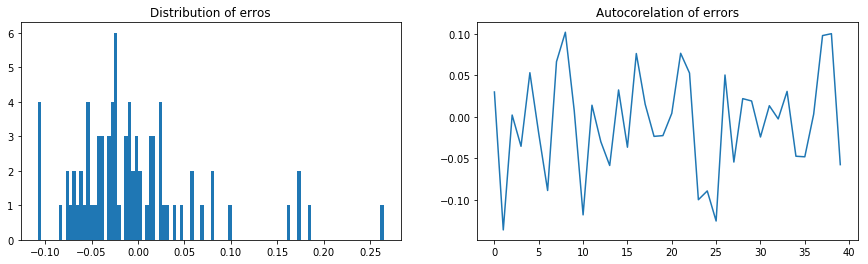

Modelinin ortalama hatası : -0.01581552907031391


In [26]:
import math
from statsmodels.tsa.stattools import acf
errors=math.e**df1_predicted-math.e**y_test
acf_data=acf(errors)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(errors/math.e**y_test , bins=100)
plt.title("Distribution of erros")

plt.subplot(1,2,2)
plt.plot(acf_data[1:])
plt.title("Autocorelation of errors")

plt.show()
print("Modelinin ortalama hatası : {}".format(np.mean(errors)))

Modelin ortalama hatası neredeyse 0'dır.

##### Varsayım 3: homoscedasticity

In [27]:
from scipy.stats import zscore , jarque_bera , normaltest , bartlett , levene
bart_stats = bartlett(math.e**df1_predicted , errors)
lev_stats = levene(math.e**df1_predicted , errors)

print(" Bartlett test value : {0:3g} and p value : {1:.21f}".format(bart_stats[0] , bart_stats[1]))
print(" Levene test value : {0:3g} and p value : {1:.21f}".format(lev_stats[0] , lev_stats[1]))

 Bartlett test value : 45.2492 and p value : 0.000000000017349017834
 Levene test value : 45.299 and p value : 0.000000000295229954060


p değerleri 0'a çok yakındır .Yani modelimiz homocedastictir.

### 7.3. Overfitting

In [30]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

y_egitim_tahmini = lrm.predict(X_train)
y_test_tahmini = lrm.predict(X_train)

print("Eğitim kümesindeki gözlem sayısı  : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı    : {}".format(X_test.shape[0]), "\n")

print("Eğitim kümesindeki R-Kare değeri  : {}".format(lrm.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lrm.score(X_test, y_test)))


Eğitim kümesindeki gözlem sayısı  : 320
Test kümesindeki gözlem sayısı    : 80 

Eğitim kümesindeki R-Kare değeri  : 0.8072828997302367
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.7839790256428478


In [ ]:
Eğitim ve test kümesindeki R-kare değerlerinin çok yüksek olmayışı modelimzde overfittingin olmadığını anlamamızı sağlar.

#### 7.2.Ridge ve Lasso Düzenlemeleri

In [31]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=1) 
ridgeregr.fit(X_train, y_train)

y_egitim_tahmini = ridgeregr.predict(X_train)
y_test_tahmini = ridgeregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(ridgeregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.8071851323045013
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.7852092848559182
Ortalama Mutlak Hata (MAE)        : 0.04788474334316709
Ortalama Kare Hata (MSE)          : 0.004208525369910035
Kök Ortalama Kare Hata (RMSE)     : 0.06487314829657981
Ortalama Mutlak Yüzde Hata (MAPE) : 7.434421669763953


Overfittingin olma ihtimaline karşı ridge ve lasso düzenlemelerini görmek istedik.Ride düzenlemesi modelimizde çok küçük bir R-kare düşüşüne sebep oldu bu yüzden bu düzenlemeye ihtiyacımız yok.

In [32]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=1) 
lassoregr.fit(X_train, y_train)

y_egitim_tahmini = lassoregr.predict(X_train)
y_test_tahmini = lassoregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.26688708988733056
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.2753613172831778
Ortalama Mutlak Hata (MAE)        : 0.09589692646256524
Ortalama Kare Hata (MSE)          : 0.014198287287167977
Kök Ortalama Kare Hata (RMSE)     : 0.11915656627801918
Ortalama Mutlak Yüzde Hata (MAPE) : 14.30018478927296


Lasso düzenlemesi var olan modelimizin R-kare değerinde büyük bir düşüşe sebep oldu.Ayrıca var olan bazı özelliklerimi kaybettik.Dolayısıyla Lasso düzenlemesine de gerek duymamaktayız.